## CODE TO PERFORM VEHICLE DETECTION USING HOG/SVM


In [1]:
# Dataset source:
# https://github.com/udacity/CarND-Vehicle-Detection
# http://www.gti.ssr.upm.es/data/Vehicle_database.html
# http://www.cvlibs.net/datasets/kitti/
        

# DISPLAY IMAGES

In [2]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog 


In [3]:
#import training dataset of vehicles/non-vehicles
import glob
car = glob.glob('data/car/**/*.png')
no_car = glob.glob('data/no car/**/*.png')


In [4]:
len(car) # number of pictures in car (car data base)

8792

In [5]:
len(no_car) # number of pictures in no car ( non car data)

8968

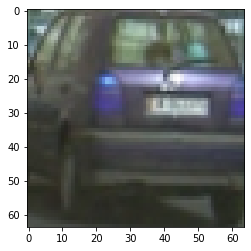

In [6]:
image_color = cv2.imread(car[300]) # to take any image  ( to read the image  )
plt.imshow(image_color) # display the image 

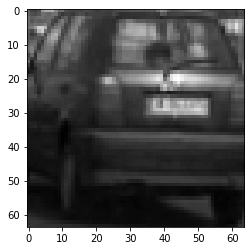

In [7]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY) # TO CONVERT IT INTO GRAY SCALE
plt.imshow(image_gray, cmap = 'gray') # TO DISPLAY THE GRAY SCALE IMAGE

# GET HOG FEATURES

In [8]:
# it is from sklearn libary s
features, hog_image = hog(image_gray, 
                          orientations = 11,  # 11 ANGLES 
                          pixels_per_cell = (16, 16),  # WINDOW SIZE
                          cells_per_block = (2, 2),  # SIZE OF BLOCK
                          transform_sqrt = False, 
                          visualize = True, 
                          feature_vector = True)

features.shape 

(396,)

In [9]:
hog_image.shape

(64, 64)

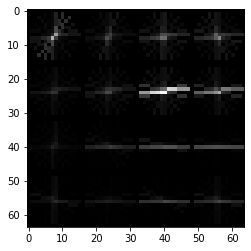

In [10]:
plt.imshow(hog_image, cmap = 'gray') # COMPUTER SEE THE CAR LIKE THIS 


# HOG FEATURE EXTRACTION AND TRAINING DATASET CREATION

In [11]:
car_hog_accum = []  # TO OBTAIN HOG IMAGE FOR ALL THE PICTURE 

for i in car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    car_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    car_hog_accum.append(car_hog_feature) # LIKE A STORAGE WHICH STORES ALL THE HOG VALUES OF EACH IMAGE 
    


In [12]:
X_car = np.vstack(car_hog_accum).astype(np.float64)  # CREATING TRAINING DATA CAR (1) NO CAR (0)
y_car = np.ones(len(X_car)) # ONCES OF THE LENGTH OF ARES

In [13]:
X_car.shape # (TOTAL IMAGES , EACH CARS FEATURS )

(8792, 396)

In [14]:
y_car.shape # 

(8792,)

In [15]:
y_car # OUTPUT OF OUR TRANING SET 

array([1., 1., 1., ..., 1., 1., 1.])

In [16]:
nocar_hog_accum = [] # SAME THING FOR NO CARS 

for i in no_car: 
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    nocar_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    nocar_hog_accum.append(nocar_hog_feature)


In [17]:
X_nocar = np.vstack(nocar_hog_accum).astype(np.float64)  
y_nocar = np.zeros(len(X_nocar)) # NO CARS GIVES US 0 BEC NO CARS ARE BE DETECTED
 


In [18]:
X_nocar.shape # (TOTAL IMAGE , HOG FEATURS FOR EACH NO CAR)

(8968, 396)

In [19]:
y_nocar.shape #( images )

(8968,)

In [20]:
X = np.vstack((X_car, X_nocar)) # feature of full data 
X.shape

(17760, 396)

In [21]:
y = np.hstack((y_car, y_nocar)) # total number of featurs  of the hole data
y.shape 

(17760,)

In [22]:
y_nocar # out put of no cars 

array([0., 0., 0., ..., 0., 0., 0.])

# SVM MODEL CLASSIFIER TRAINING 

In [ ]:
from sklearn.model_selection import train_test_split # Importing the module 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)  # for traing the machine (25% for testing)


In [ ]:
from sklearn.svm import LinearSVC # linear support vector classifier 
from sklearn.metrics import classification_report,confusion_matrix # module confusion matrix
svc_model = LinearSVC()
svc_model.fit(X_train,y_train)

In [ ]:
y_predict = svc_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d") # give us value like tp tn (0 no car , 1 car decte)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
Model_prediction = svc_model.predict(X_test[0:50])
Model_prediction # 0 - no car , 1 -car


In [ ]:
Model_TrueLabel = y_test[0:50]
Model_TrueLabel

# IMPROVE THE MODEL 

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}  # paremetres grid 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_

# it will take time but will give you a best grid 


In [ ]:
grid_predictions = grid.predict(X_test)                  # give the best value and improve  the module  
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

# TEST THE MODEL (FIND CARS)!

In [ ]:
test_image = mpimg.imread('my_test_image_resized.jpg')
plt.imshow(test_image)
test_image = test_image.astype(np.float32)/255

In [ ]:
h_start = 300
h_stop = 480

pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 3 


masked_region = test_image[h_start:h_stop,:,:]
plt.imshow(masked_region)
masked_region.shape


In [ ]:
resizing_factor = 2
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

In [ ]:
masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W))) # to resize the image to fit in 64 by 64 
masked_region_resized_R = masked_region_resized[:,:,0]

print(masked_region_resized.shape)
plt.imshow(masked_region_resized)


In [ ]:
    
print(masked_region_resized_R.shape)    
masked_region_hog_feature_all, hog_img = hog(masked_region_resized_R, orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualize = True, feature_vector = False)
 

In [ ]:
n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1  # scan throw all the image 
n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

#nfeat_per_block = orientations * cells_in_block **2 
blocks_in_window = (64 // pixels_in_cell)-1 
    
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

rectangles_found = []

for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        print(hog_feat_sample.shape)  
        
        # predict using trained SVM
        test_prediction = svc_model.predict(hog_feat_sample.reshape(1,-1))
        # test_prediction = grid.predict(hog_feat_sample.reshape(1,-1))
        
        if test_prediction == 1: 
            rectangle_x_left = np.int(x_left * resizing_factor)
            rectangle_y_top = np.int(y_top * resizing_factor)
            window_dim = np.int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start),(rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))
                

In [ ]:
rectangles_found # list of all the car been detectd 

In [ ]:
Image_with_Rectangles_Drawn = np.copy(test_image)
    
for rectangle in rectangles_found:
    cv2.rectangle(Image_with_Rectangles_Drawn, rectangle[0], rectangle[1], (0, 255, 0), 20)

plt.imshow(Image_with_Rectangles_Drawn)
        